<a href="https://colab.research.google.com/github/Fahlevi20/Data-Science-Labolatory-Test-tahap-2/blob/main/TugasWeek3_1104194094.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# masukkan Dataset

In [4]:
!gdown -- id "1YT9tJ5wygYidlz0ie6RqzMR7AFCGJ5Qe" # train


usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--id] url_or_id
gdown: error: unrecognized arguments: 1YT9tJ5wygYidlz0ie6RqzMR7AFCGJ5Qe


In [5]:
df = pd.read_csv('dataset.csv')

# Exploratory Data Analysis (EDA)

In [6]:
df

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,GrLivArea,ExterCond,SalePrice
0,-0.208034,-0.189583,-0.064658,-0.261682,0.618629,-0.513699,1.021506,0.840573,1.021420,0.375429,-0.217239,12.247694
1,0.409895,-0.044400,-0.064658,-0.261682,-0.086279,2.228313,0.170767,-0.433726,-0.691884,-0.470321,-0.217239,12.109011
2,-0.084449,0.163905,-0.064658,-0.261682,0.618629,-0.513699,0.958488,0.793377,1.021420,0.518905,-0.217239,12.317167
3,-0.414011,-0.050713,-0.064658,-0.261682,0.618629,-0.513699,-1.751273,-0.716904,-0.691884,0.388644,-0.217239,11.849398
4,0.574676,0.543905,-0.064658,-0.261682,1.323537,-0.513699,0.926979,0.698984,1.021420,1.296692,-0.217239,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,-0.331620,-0.256872,-0.064658,-0.261682,-0.086279,-0.513699,0.895471,0.698984,-0.691884,0.256496,-0.217239,12.072541
1197,0.615871,0.406928,-0.064658,-0.261682,-0.086279,0.400305,0.233785,0.132629,-0.691884,1.060713,-0.217239,12.254863
1198,-0.166839,-0.114846,-0.064658,-0.261682,0.618629,3.142317,-0.932043,0.982162,2.734723,1.564765,2.649836,12.493130
1199,-0.084449,-0.029630,-0.064658,-0.261682,-0.791187,0.400305,-0.648463,0.510199,-0.691884,-0.817682,-0.217239,11.864462


In [7]:
df.describe()

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,GrLivArea,ExterCond,SalePrice
count,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1.201000e+03,1201.000000
mean,-2.667632e-16,-2.018566e-17,-1.493463e-15,1.442088e-16,-2.338771e-16,-8.892877e-17,-2.003509e-15,1.415742e-15,9.336597e-17,5.685155e-17,-6.894753e-16,12.015821
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,0.416045
min,-2.020626e+00,-1.092241e+00,-6.465758e-02,-2.616816e-01,-3.610820e+00,-3.255712e+00,-3.106154e+00,-1.660829e+00,-2.405187e+00,-2.222231e+00,-5.951389e+00,10.460242
25%,-4.552059e-01,-3.196164e-01,-6.465758e-02,-2.616816e-01,-7.911875e-01,-5.136992e-01,-6.484632e-01,-9.056887e-01,-6.918835e-01,-7.119635e-01,-2.172388e-01,11.755872
50%,-4.325330e-02,-8.707156e-02,-6.465758e-02,-2.616816e-01,-8.627934e-02,-5.136992e-01,4.473155e-02,4.630027e-01,-6.918835e-01,-1.040808e-01,-2.172388e-01,11.979799
75%,4.098945e-01,1.637789e-01,-6.465758e-02,-2.616816e-01,6.186288e-01,4.003049e-01,1.021506e+00,8.877690e-01,1.021420e+00,4.849235e-01,-2.172388e-01,12.271392
max,1.000839e+01,2.591742e+01,1.546609e+01,4.766791e+00,2.733353e+00,3.142317e+00,1.242068e+00,1.170947e+00,2.734723e+00,7.798394e+00,5.516912e+00,13.534473


# Data Cleaning/Cleansing

In [8]:
for i in df.columns:
  df.loc[df[i]=='none',[i]]=float('nan')
df.isna().sum()

LotFrontage     0
LotArea         0
Street          0
Alley           0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
GrLivArea       0
ExterCond       0
SalePrice       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1201 non-null   float64
 2   Street        1201 non-null   float64
 3   Alley         1201 non-null   float64
 4   OverallQual   1201 non-null   float64
 5   OverallCond   1201 non-null   float64
 6   YearBuilt     1201 non-null   float64
 7   YearRemodAdd  1201 non-null   float64
 8   ExterQual     1201 non-null   float64
 9   GrLivArea     1201 non-null   float64
 10  ExterCond     1201 non-null   float64
 11  SalePrice     1201 non-null   float64
dtypes: float64(12)
memory usage: 112.7 KB


# **Data Pre-processing**

Disini saya mencoba dengan 2 metode yaitu menggunakan Standard Scaler dan tidak untuk melihat perbandingan kedua data tersebut

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
#X=scaler.fit_transform(df.iloc[:,:-1])
#Y=df['SalePrice']
X=df.drop('SalePrice',axis=1)
Y=df['SalePrice']

# **Training Linear Regression Model**

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# **Linear Regression Model**

In [14]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred=model.predict(X_test)
y_pred

array([11.45015464, 12.26844717, 11.69662759, 12.49213501, 12.2686862 ,
       11.93694128, 11.64820255, 11.91114944, 11.89401443, 12.49426113,
       11.67101231, 11.23397603, 11.66774481, 11.58879882, 11.83534115,
       10.76712308, 12.12616784, 11.2261379 , 11.63771439, 11.85222722,
       11.9403931 , 12.280821  , 11.68094577, 11.81256199, 12.23901918,
       12.42771481, 11.44080021, 11.83226987, 12.05549482, 11.7729551 ,
       11.92094182, 12.43378865, 11.23513452, 11.48707297, 11.83556033,
       12.37967099, 12.19221974, 12.06957401, 11.74188301, 12.08913696,
       12.22298823, 12.48588775, 11.78111661, 11.79186988, 12.20921051,
       11.63783635, 11.7328148 , 11.98135223, 12.78148771, 12.10023121,
       12.36526689, 11.83789212, 12.26648127, 12.27239462, 11.4264051 ,
       11.97920663, 11.60224651, 11.71557668, 12.2492637 , 11.67582541,
       11.89114482, 11.5053881 , 12.11963133, 11.55932692, 12.28584976,
       11.84215358, 11.86644767, 12.12333635, 12.04324822, 12.47

# **Model Evaluation**

In [16]:
from sklearn.metrics import mean_absolute_error
print('nilai mae:',mean_absolute_error(y_pred,Y_test))
print('nilai mse:',mean_squared_error(y_pred,Y_test))
print('nilai rmse:',np.sqrt(mean_squared_error(y_pred,Y_test)))

print('nilai r^2:',r2_score(y_pred,Y_test))
print('\nnilai Coefficient:\n',model.coef_)
print('\nnilai intercept:',model.intercept_)


nilai mae: 0.11165986940764161
nilai mse: 0.020925585830023245
nilai rmse: 0.1446567863255065
nilai r^2: 0.8473453008150221

nilai Coefficient:
 [ 0.01671328  0.03084874 -0.00402658 -0.00507253  0.15578432  0.05454615
  0.11924461  0.01939592  0.03164925  0.13808331  0.00532596]

nilai intercept: 12.01283505558578


jika dilihat dari hasil MSE atau Mean Squared Error yang kecil yaitu sebesar 0.020925585830023245 lalu disusul MAE dan RMSE nya dan juga hasil R^2 nya yaitu 0.8473453008150221 disini kita dapat mengambil kesimpulan bahwa hasil prediksi menggunakan model Linear Regression tanpa standard scaler hasilnya adalah lumayan baik karena R^2 nya diatas 0.80 atau 80% dan juga errornya kecil.

# **Prediction Model Linear Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


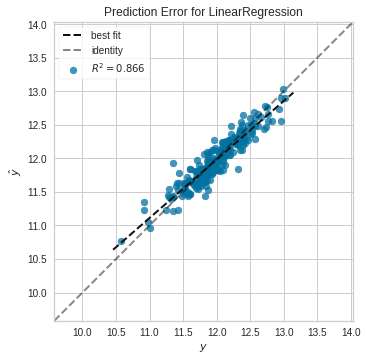

In [17]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(model)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

dan disini juga menggunakan grafik linear regression mendapatkan hasil R^2 nya yaitu 0.866, disini kita bisa tau bahwa hasil prediksi kita juga baik. 

# **Data Pre-Processing using Standard Scaler**

In [18]:
scaler=StandardScaler()
#X=scaler.fit_transform(df.iloc[:,:-1])
#Y=df['SalePrice']

# **Training Linear Regression Model**

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
model2=LinearRegression()
model2.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred=model2.predict(X_test)
y_pred

array([11.45015464, 12.26844717, 11.69662759, 12.49213501, 12.2686862 ,
       11.93694128, 11.64820255, 11.91114944, 11.89401443, 12.49426113,
       11.67101231, 11.23397603, 11.66774481, 11.58879882, 11.83534115,
       10.76712308, 12.12616784, 11.2261379 , 11.63771439, 11.85222722,
       11.9403931 , 12.280821  , 11.68094577, 11.81256199, 12.23901918,
       12.42771481, 11.44080021, 11.83226987, 12.05549482, 11.7729551 ,
       11.92094182, 12.43378865, 11.23513452, 11.48707297, 11.83556033,
       12.37967099, 12.19221974, 12.06957401, 11.74188301, 12.08913696,
       12.22298823, 12.48588775, 11.78111661, 11.79186988, 12.20921051,
       11.63783635, 11.7328148 , 11.98135223, 12.78148771, 12.10023121,
       12.36526689, 11.83789212, 12.26648127, 12.27239462, 11.4264051 ,
       11.97920663, 11.60224651, 11.71557668, 12.2492637 , 11.67582541,
       11.89114482, 11.5053881 , 12.11963133, 11.55932692, 12.28584976,
       11.84215358, 11.86644767, 12.12333635, 12.04324822, 12.47

# **Model Evaluation**

In [22]:
from sklearn.metrics import mean_absolute_error
print('nilai mae:',mean_absolute_error(y_pred,Y_test))
print('nilai mse:',mean_squared_error(y_pred,Y_test))
print('nilai rmse:',np.sqrt(mean_squared_error(y_pred,Y_test)))

print('nilai r^2:',r2_score(y_pred,Y_test))
print('\nnilai Coefficient:\n',model2.coef_)
print('\nnilai intercept:',model2.intercept_)


nilai mae: 0.11165986940764161
nilai mse: 0.020925585830023245
nilai rmse: 0.1446567863255065
nilai r^2: 0.8473453008150221

nilai Coefficient:
 [ 0.01671328  0.03084874 -0.00402658 -0.00507253  0.15578432  0.05454615
  0.11924461  0.01939592  0.03164925  0.13808331  0.00532596]

nilai intercept: 12.01283505558578


jika dilihat dari hasil MSE atau Mean Squared Error yang kecil yaitu sebesar 0.020925585830023245 lalu disusul MAE dan RMSE nya dan juga hasil R^2 nya yaitu 0.8473453008150221 disini kita dapat mengambil kesimpulan bahwa hasil prediksi menggunakan model Linear Regression menggunakan standard scaler hasilnya sama seperti yang tanpa menggunakan Standar Scaler.

# **Prediction Model Linear Regression with Standard Scaler**

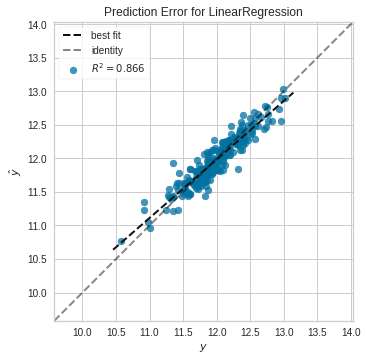

In [23]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(model2)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

untuk bagian visualisasinya juga sama yang menggunakan standard scaler dengan yang tanpa menggunakan standard scaler yaitu 0.866 

untuk hasil yang saya dapatkan belum tentu baik dan juga valid dikarenakan bisa saja ada malfunction dari codingan tersebut karena masih dikerjakan oleh manusia
